# Let's learn to plot nicely (kind of) with matplotlib

## Import what needs importing and read in our file

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("countries.csv")
df.head()

,country,continent,gdp_per_capita,life_expectancy,population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856
2,Algeria,Africa,5098,68.963,30533827
3,Angola,Africa,2446,45.234,13926373
4,Antigua and Barbuda,N. America,12738,73.544,77656


Let's just pull out the first five into a new dataframe so we can graph without seeing a million billion countries

In [3]:
small_df = df.head()
small_df

,country,continent,gdp_per_capita,life_expectancy,population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856
2,Algeria,Africa,5098,68.963,30533827
3,Angola,Africa,2446,45.234,13926373
4,Antigua and Barbuda,N. America,12738,73.544,77656


## Just doing `.plot()` on a dataframe: graph EVERY numeric column

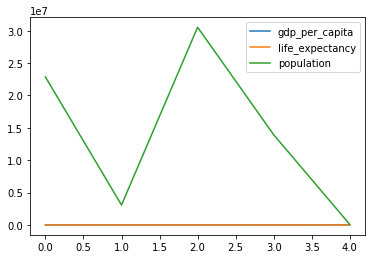

In [4]:
small_df.plot()

Lines look dumb, so let's make it a bar graph instead.

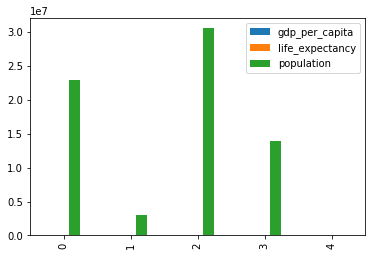

In [5]:
small_df.plot(kind='bar')

## By default the x axis is the index, we can use `x=` to set a column to be our x axis

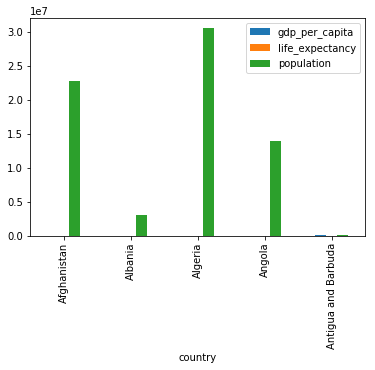

In [6]:
small_df.plot(kind='bar', x='country')

## ...and use `y=` to set a column to be our y axis

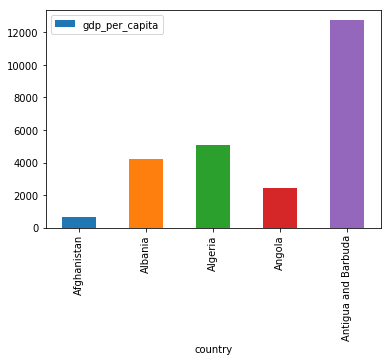

In [7]:
small_df.plot(kind='bar', x='country', y='gdp_per_capita')

## Or even multiple things on our y axis!

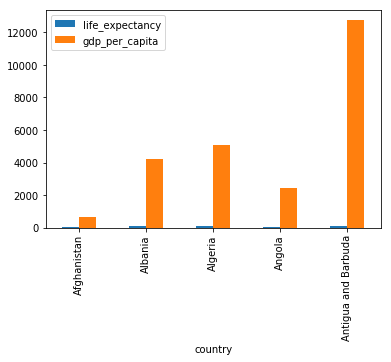

In [8]:
small_df.plot(kind='bar', x='country', y=['life_expectancy', 'gdp_per_capita'])

## Why multiple things on the y axis? Think comparing or stacked bar graphs

In [9]:
gender_df = pd.read_csv("gender.csv")
gender_df

,state,male,female
0,Texas,30,22
1,New Mexico,45,34
2,Colorado,32,44
3,Arizona,21,33


## Compare men vs women in different states

* Each bar is a column - we want men and women, so we need two numeric columns
* Each set of bars is one row - so all of row #1's stuff will be grouped together, all of row #2's stuff, etc.

You could also do this with more than just two things (men vs women) - you could do it with different kinds of violent crime, etc.

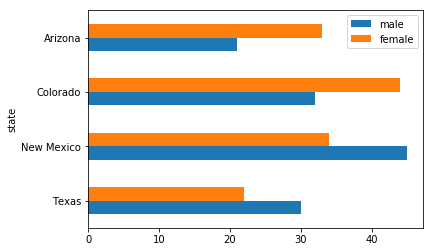

In [13]:
gender_df.plot(kind='barh', x='state')

## Stack them if you want with `stacked=True`

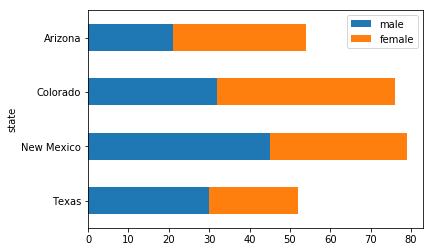

In [14]:
gender_df.plot(kind='barh', x='state', stacked=True)

## Change the size of your plot with `figsize=`

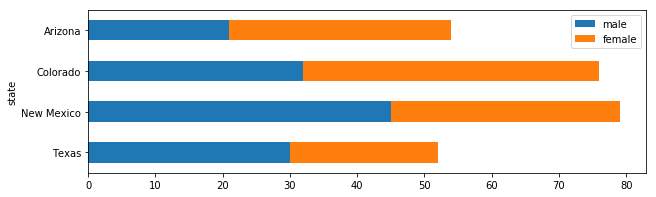

In [18]:
gender_df.plot(kind='barh', x='state', stacked=True, figsize=(10, 3))

## You could give it a title with `title=`...

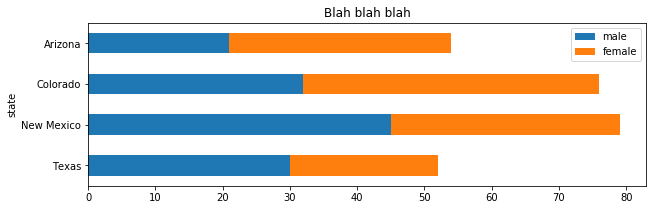

In [19]:
gender_df.plot(kind='barh', x='state', stacked=True, figsize=(10, 3), title="Blah blah blah")

## But that gets busy, so you could also use `ax.set_title("Blah blah")`. You can also set the font size.

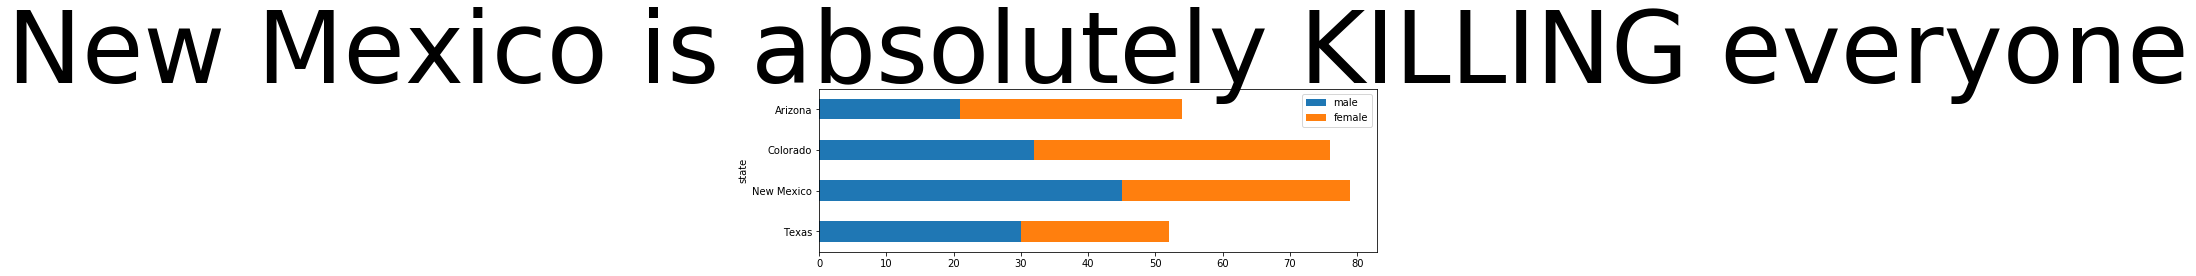

In [26]:
ax = gender_df.plot(kind='barh', x='state', stacked=True, figsize=(10, 3))
ax.set_title("New Mexico is absolutely KILLING everyone")
ax.title.set_fontsize(100)

## Use `pad=` with `set_title` to add some spacing between the title and the chart

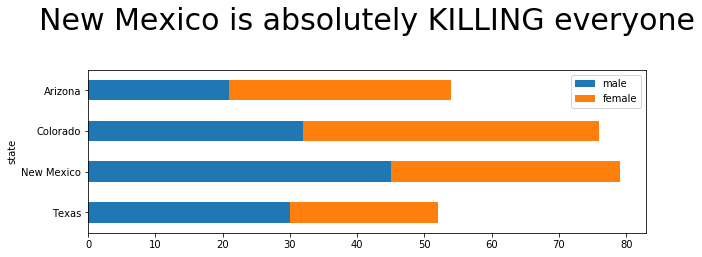

In [30]:
ax = gender_df.plot(kind='barh', x='state', stacked=True, figsize=(10, 3))
ax.set_title("New Mexico is absolutely KILLING everyone", pad=40)
ax.title.set_fontsize(30)

## Why won't Papyrus work?

/Users/jonathansoma/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Papyrus'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


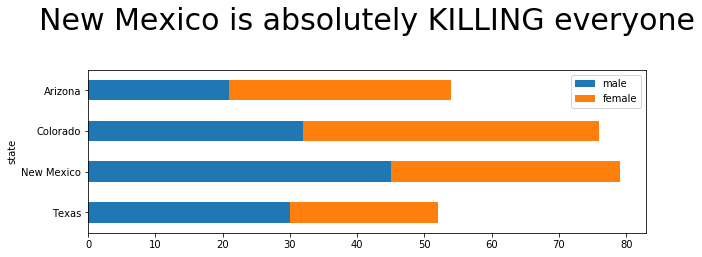

In [32]:
ax = gender_df.plot(kind='barh', x='state', stacked=True, figsize=(10, 3))
ax.set_title("New Mexico is absolutely KILLING everyone", pad=40)
ax.title.set_fontsize(30)
ax.title.set_fontname("Papyrus")

## Let's see all of the fonts that matplotlib knows about (they're speeecial)

In [33]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))


## We can pick from this list and it'll work great

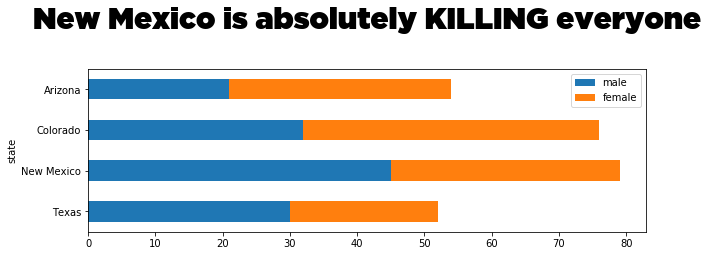

In [34]:
ax = gender_df.plot(kind='barh', x='state', stacked=True, figsize=(10, 3))
ax.set_title("New Mexico is absolutely KILLING everyone", pad=40)
ax.title.set_fontsize(30)
ax.title.set_fontname("Gotham Ultra")

## If you're using Chinese, Japanese or Korean you'll probably need to change the font. Arial Unicode MS seems to work well.

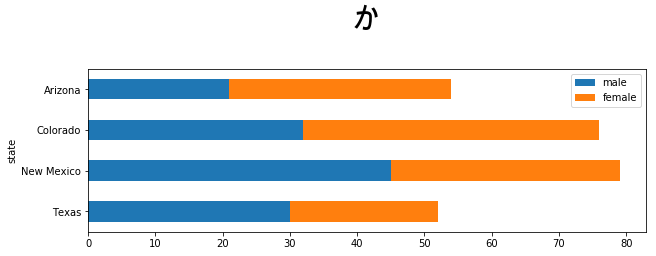

In [40]:
ax = gender_df.plot(kind='barh', x='state', stacked=True, figsize=(10, 3))
ax.set_title("鉛筆", pad=40)
ax.title.set_fontsize(30)
ax.title.set_fontname("Arial Unicode MS")

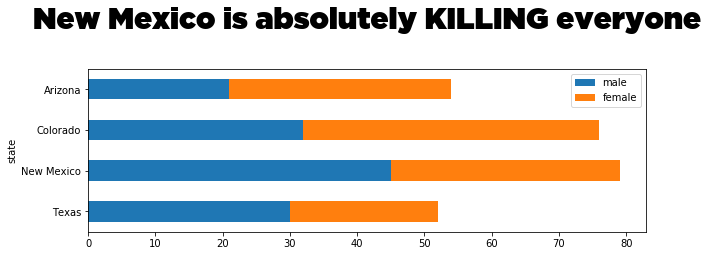

In [44]:
ax = gender_df.plot(kind='barh', x='state', stacked=True, figsize=(10, 3))
ax.set_title("New Mexico is absolutely KILLING everyone", pad=40)
ax.title.set_fontsize(30)
ax.title.set_fontname("Gotham Ultra")

## Okay back to the original dataframe

In [46]:
small_df

,country,continent,gdp_per_capita,life_expectancy,population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856
2,Algeria,Africa,5098,68.963,30533827
3,Angola,Africa,2446,45.234,13926373
4,Antigua and Barbuda,N. America,12738,73.544,77656


## Let's make this look like a fivethirtyeight plot, kind of! First we'll set the color and manually adjust the ticks on the x axis

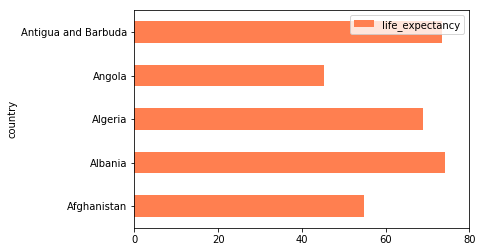

In [59]:
ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color='coral')
ax.set_xticks([0, 20, 40, 60, 80])

## And turn off the axis

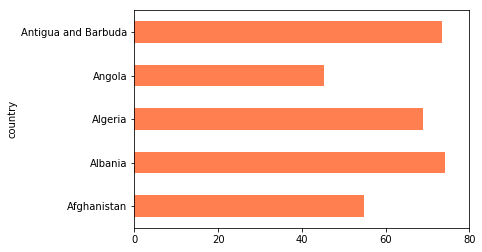

In [65]:
ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color='coral', legend=False)
ax.set_xticks([0, 20, 40, 60, 80])

## And add a label on the x axis

You can do the same thing for the y axis for all of these, it's just yticks/ylabel instead of xticks/xlabel

Text(0.5,0,'Life Expectancy (years)')

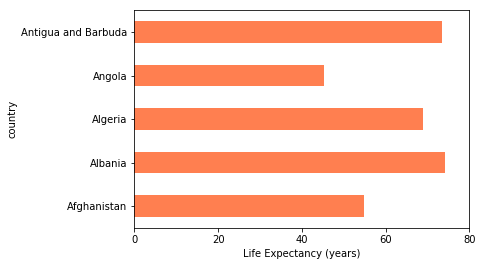

In [66]:
ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color='coral', legend=False)
ax.set_xticks([0, 20, 40, 60, 80])
ax.set_xlabel("Life Expectancy (years)")

## If you want the ticks to be certain things that AREN'T the data, you can manually set the labels. They'll show up at the same place as you said .set_ticks should be at. 

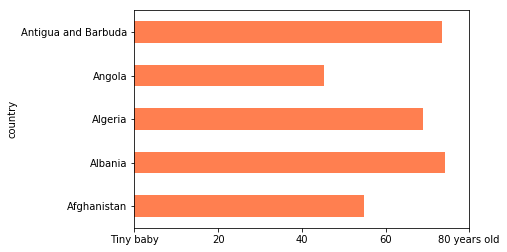

In [70]:
ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color='coral', legend=False)
# What numbers the tick marks will appear at
ax.set_xticks([0, 20, 40, 60, 80])

# What the actual text is that appears at those places
ax.set_xticklabels(["Tiny baby", 20, 40, 60, '80 years old'])

## You can align the tick labels if you want

[Text(0,0,'Tiny baby'),
 Text(0,0,'20'),
 Text(0,0,'40'),
 Text(0,0,'60'),
 Text(0,0,'80 years old')]

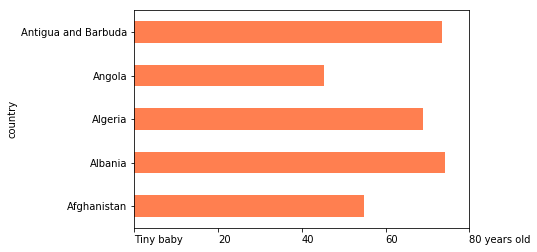

In [74]:
ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color='coral', legend=False)
# What numbers the tick marks will appear at
ax.set_xticks([0, 20, 40, 60, 80])

# What the actual text is that appears at those places
text_options = {
    'horizontalalignment': 'left'
}
ax.set_xticklabels(["Tiny baby", 20, 40, 60, '80 years old'], fontdict=text_options)

## You can give multiple colors to the bars if you want

Although if you don't match the number of bars and the number of colors it does weird repeating stuff

[Text(0,0,'Just born'),
 Text(0,0,'Cool teen'),
 Text(0,0,'40'),
 Text(0,0,'60'),
 Text(0,0,'80 years old')]

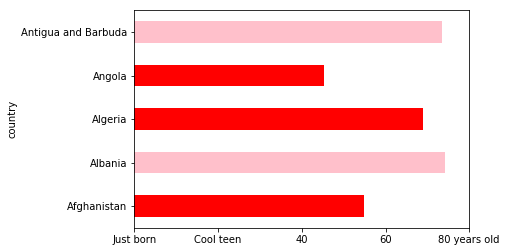

In [82]:
bar_colors = ['red', 'pink']

ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color=bar_colors, legend=False)
# What numbers the tick marks will appear at
ax.set_xticks([0, 20, 40, 60, 80])

# What the actual text is that appears at those places
ax.set_xticklabels(["Just born", 'Cool teen', 40, 60, '80 years old'])

## Count up from the bottom and you can match your color list to your bars

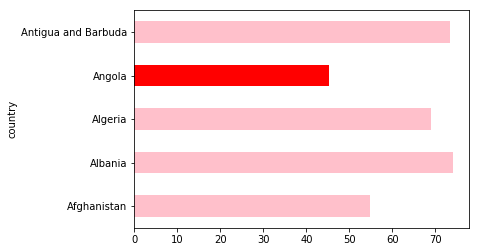

In [84]:
# Manually specify the colors as a list
bar_colors = ['pink', 'pink', 'pink', 'red', 'pink']

ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color=bar_colors, legend=False)

## Use a dictionary to set the colors

It's a list comprehension that does it! You can just scroll down to see the result.

In [86]:
color_dict = {
    'Antigua and Barbuda': 'pink',
    'Angola': 'red',
    'Algeria': 'pink',
    'Albania': 'pink',
    'Afghanistan': 'pink'
}

#ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color=color_dict, legend=False)

In [90]:
[name for name in small_df.country]

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda']

In [92]:
color_dict['Afghanistan']

'pink'

In [93]:
color_dict['Albania']

'pink'

In [94]:
color_dict = {
    'Antigua and Barbuda': 'pink',
    'Angola': 'red',
    'Algeria': 'pink',
    'Albania': 'pink',
    'Afghanistan': 'pink'
}

[color_dict[name] for name in small_df.country]

['pink', 'pink', 'pink', 'red', 'pink']

## Use a list comprehension to give each bar a color based on the label

You'll need to change the dictionary and the `small_df.country` part.

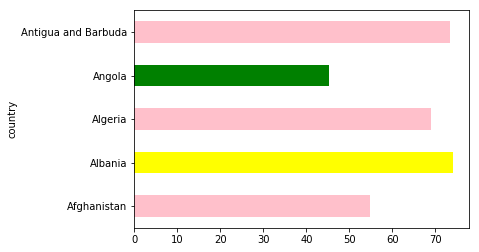

In [97]:
color_dict = {
    'Antigua and Barbuda': 'pink',
    'Angola': 'green',
    'Algeria': 'pink',
    'Albania': 'yellow',
    'Afghanistan': 'pink'
}

bar_colors = [color_dict[name] for name in small_df.country]

ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color=bar_colors, legend=False)

## You can also use a function to be a little more specific about colors

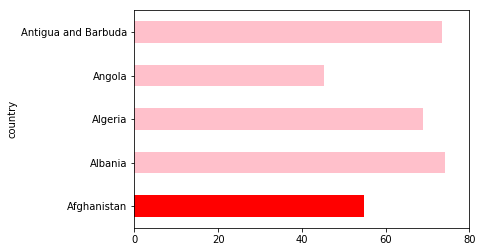

In [120]:
def get_color(country):
    if country == "Afghanistan":
        return 'red'
    else:
        return 'pink'

bar_colors = [get_color(name) for name in small_df.country]

ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color=bar_colors, legend=False)
ax.set_xticks([0, 20, 40, 60, 80])
# ax.set_title("Some countries are bigger than others", fontsize=20, pad=30, ha='right')
# ax.text(x=-1, y=-1, s="blah blah")

## Remove the frame around the chart by adjusting the SPINES

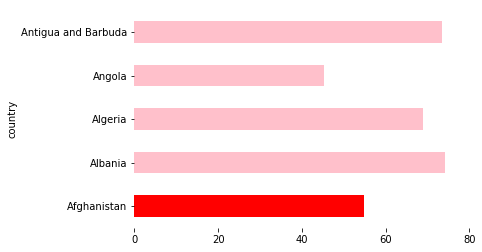

In [123]:
def get_color(country):
    if country == "Afghanistan":
        return 'red'
    else:
        return 'pink'

bar_colors = [get_color(name) for name in small_df.country]

ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color=bar_colors, legend=False)
ax.set_xticks([0, 20, 40, 60, 80])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

## Remove the ticks by the country names (y axis) by playing with `tick_params`

Tick params can do MANY MANY AMAZING THINGS.

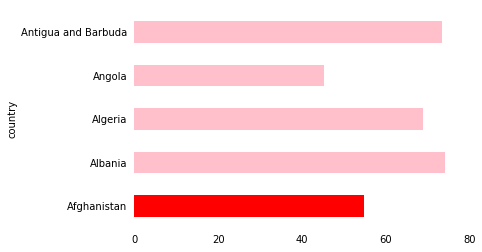

In [129]:
def get_color(country):
    if country == "Afghanistan":
        return 'red'
    else:
        return 'pink'

bar_colors = [get_color(name) for name in small_df.country]

ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color=bar_colors, legend=False)
ax.set_xticks([0, 20, 40, 60, 80])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major', left=False, bottom=False)

## Turn on a grid only on the x axis

If you wanted it on both axes, `ax.grid(True)` would do that for you.

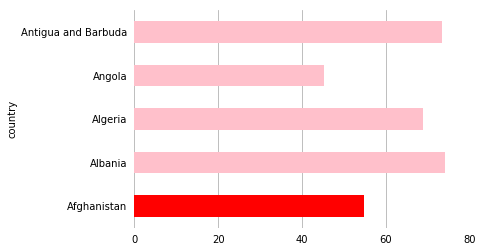

In [134]:
def get_color(country):
    if country == "Afghanistan":
        return 'red'
    else:
        return 'pink'

bar_colors = [get_color(name) for name in small_df.country]

ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color=bar_colors, legend=False)
ax.set_xticks([0, 20, 40, 60, 80])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major', left=False, bottom=False)

ax.grid(True, axis='x')
ax.set_axisbelow(True)

## Adjust the xlim to 0-80 so we get a grid line at 80, too

(0, 81)

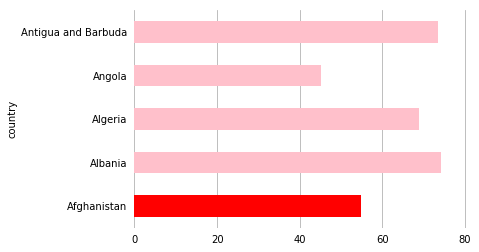

In [136]:
def get_color(country):
    if country == "Afghanistan":
        return 'red'
    else:
        return 'pink'

bar_colors = [get_color(name) for name in small_df.country]

ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color=bar_colors, legend=False)
ax.set_xticks([0, 20, 40, 60, 80])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major', left=False, bottom=False)

ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.set_xlim(0, 81)

## Remove the y axis label by setting it not visible

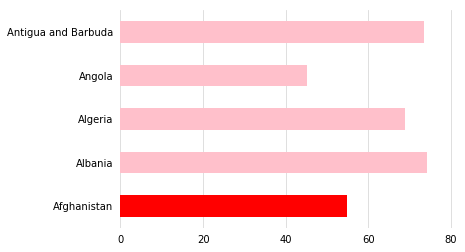

In [147]:
def get_color(country):
    if country == "Afghanistan":
        return 'red'
    else:
        return 'pink'

bar_colors = [get_color(name) for name in small_df.country]

ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color=bar_colors, legend=False)
ax.set_xticks([0, 20, 40, 60, 80])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.5)

ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.set_xlim(0, 81)
ax.yaxis.label.set_visible(False)

## Give the graph a background. It only works for the inside-the-graph part, though! You need to use rcparams really to do the other one

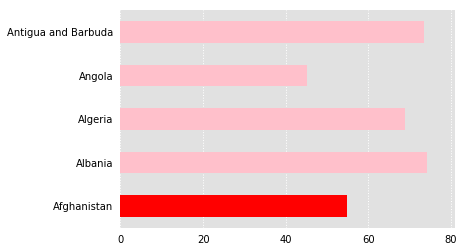

In [155]:
def get_color(country):
    if country == "Afghanistan":
        return 'red'
    else:
        return 'pink'

bar_colors = [get_color(name) for name in small_df.country]

ax = small_df.plot(x='country', y='life_expectancy', kind='barh', color=bar_colors, legend=False)
ax.set_xticks([0, 20, 40, 60, 80])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major', left=False, bottom=False)
ax.set_facecolor('#e1e1e1')

ax.grid(True, axis='x', color='white', linestyle=':', linewidth=1)
ax.set_axisbelow(True)
ax.set_xlim(0, 81)
ax.yaxis.label.set_visible(False)

## Okay let's go back to a normal one

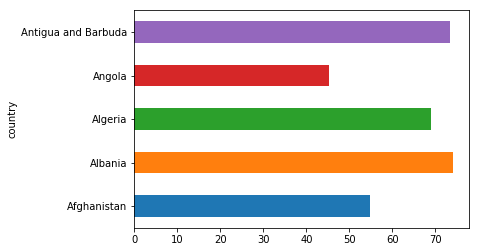

In [156]:
small_df.plot(x='country', y='life_expectancy', kind='barh', legend=False)

## And then turn on the matplotlib fivethirtyeight style

You can see all your options at https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

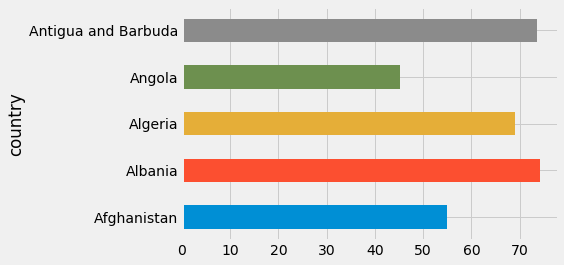

In [159]:
plt.style.use('fivethirtyeight')

small_df.plot(x='country', y='life_expectancy', kind='barh', legend=False)

## If you use `plt.style.use` it keeps on working even if you don't type it in the next cell

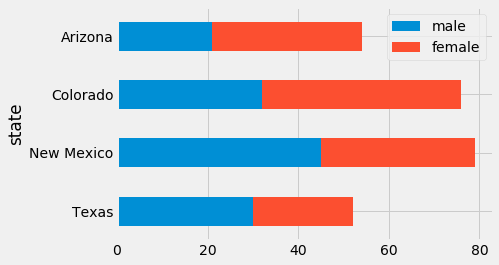

In [161]:
gender_df.plot(x='state', kind='barh', stacked=True)

## You can reset it to go back to 'normal'

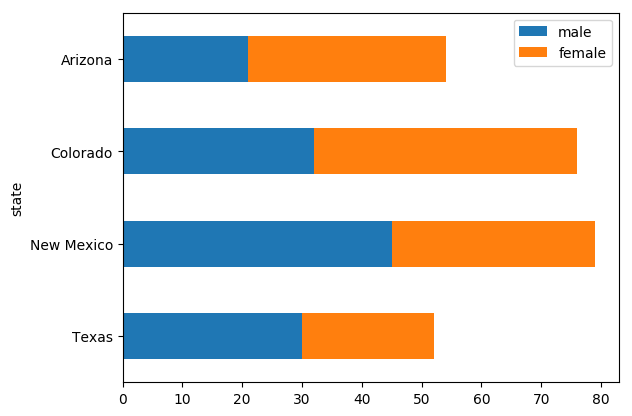

In [163]:
# When we use a style, rcdefaults() takes us back to the... default
plt.rcdefaults()

gender_df.plot(x='state', kind='barh', stacked=True)

## You use plt.rcParams.update to manually set 'permanent' matplotlib changes. We use this so we can export good text that's editable in Illustrator. plt.savefig saves the graphic for us.

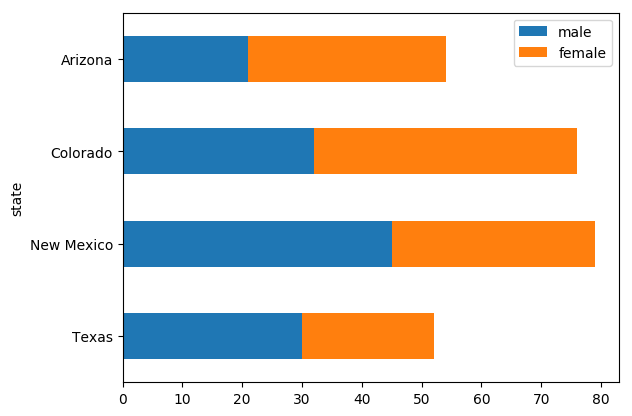

In [166]:
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})


gender_df.plot(x='state', kind='barh', stacked=True)

# Saves it as a pdf
plt.savefig("output-2.pdf")

## You can customize matplotlib using rcparams like crazy, that way you don't have to do your changes every time.

We can see how they do the fivethirtyeight one at https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/mpl-data/stylelib/fivethirtyeight.mplstyle 

* Blank one here: https://matplotlib.org/users/customizing.html#a-sample-matplotlibrc-file
* Many more: https://github.com/matplotlib/matplotlib/tree/master/lib/matplotlib/mpl-data/stylelib
* See them in action: https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

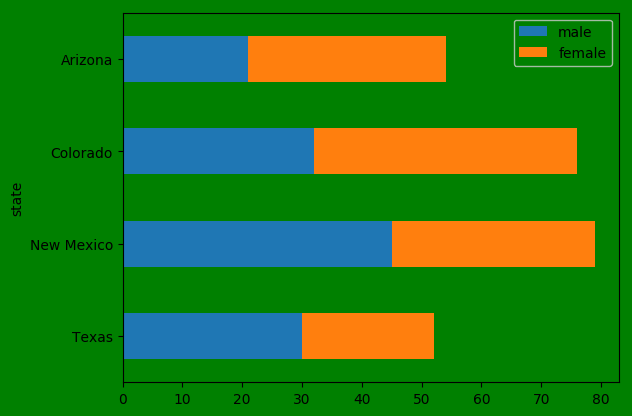

In [170]:
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': 'green',
    'axes.facecolor': 'green'
})


gender_df.plot(x='state', kind='barh', stacked=True)

# Saves it as a pdf
#plt.savefig("output-2.pdf")